---

## Dataset Description and Machine Learning Problem

### Overview

The competition aims to **predict the transaction price of used cars** based on their various features.  
The dataset is provided by a major online used car trading platform and contains **over 400,000 transaction records**.  
It includes **31 columns (features)**, of which **15 are anonymized variables** (`v_0` to `v_14`).

To ensure fairness, the data has been split as follows:
- **Training set:** 150,000 samples  
- **Test set A:** 50,000 samples  
- **Test set B:** 50,000 samples  

Additionally, identifiers such as `name`, `model`, `brand`, and `regionCode` have been **desensitized (anonymized)** for privacy protection.

---

### Objective

Develop and optimize a regression model capable of accurately predicting the transaction prices of used cars using both the **explicit features** (e.g., power, kilometer, body type) and the **anonymous features** ($v_0$–$v_{14}$), while minimizing the MAE score on the test sets.

---

### Feature Description

| Feature Name | Description |
|---------------|-------------|
| SaleID | Unique ID of the sales record |
| name | Vehicle code |
| regDate | Vehicle registration date |
| model | Model code |
| brand | Brand of the vehicle |
| bodyType | Body type (e.g., sedan, SUV, etc.) |
| fuelType | Type of fuel used (e.g., gasoline, diesel, etc.) |
| gearbox | Type of transmission (manual/automatic) |
| power | Engine power |
| kilometer | Total mileage (in kilometers) |
| notRepairedDamage | Indicates whether there is unrepaired damage |
| regionCode | Encoded region where the vehicle is sold |
| seller | Seller type |
| offerType | Offer type |
| creatDate | Date when the ad was published |
| price | **Target variable** – transaction price of the vehicle |
| $v_0$ to $v_{14}$ | Anonymous numerical features representing hidden patterns or composite variables |

---

### Machine Learning Task

This is a **supervised regression problem**, where the goal is to predict the **used car price (`price`)** based on all other available features.

The evaluation metric for the competition is **Mean Absolute Error (MAE)**, defined as:

$$
MAE = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

where  
- $y_i$ = true price of the $i^{th}$ car  
- $\hat{y}_i$ = predicted price of the $i^{th}$ car  
- $n$ = total number of cars in the test set

A **lower MAE** indicates better model performance.

---

### Evaluation Metric: MAE (Mean Absolute Error)

If the true values are

$$
y = (y_1, y_2, \cdots, y_n)
$$


and the predicted values from the model are

$$
\hat{y} = (\hat{y}_1, \hat{y}_2, \cdots, \hat{y}_n)
$$


then the **Mean Absolute Error (MAE)** of this model is calculated as follows:

$$
MAE = \frac{\sum_{i=1}^{n} |y_i - \hat{y}_i|}{n}
$$
### Interpretation

The smaller the MAE, the more accurate the model’s predictions are.


### Example

If the true values are

$$
y = (15, 20, 12)
$$

and the predicted values are

$$
\hat{y} = (17, 24, 9)
$$

then the **MAE** of these predictions is:

$$
MAE = \frac{|15 - 17| + |20 - 24| + |12 - 9|}{3} = 3
$$


---

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [3]:
df = pd.read_csv('used_car_train_20200313.csv')
df.head()

,SaleID name regDate model brand bodyType fuelType gearbox power kilometer notRepairedDamage regionCode seller offerType creatDate price v_0 v_1 v_2 v_3 v_4 v_5 v_6 v_7 v_8 v_9 v_10 v_11 v_12 v_13 v_14
0,0 736 20040402 30.0 6 1.0 0.0 0.0 60 12.5 0.0 ...
1,1 2262 20030301 40.0 1 2.0 0.0 0.0 0 15.0 - 43...
2,2 14874 20040403 115.0 15 1.0 0.0 0.0 163 12.5...
3,3 71865 19960908 109.0 10 0.0 0.0 1.0 193 15.0...
4,4 111080 20120103 110.0 5 1.0 0.0 0.0 68 5.0 0...


**Note:**

The way to seperate columns:
1. test ',': sep=','
2. test 'Tab': sep='\t'
3. test ';': sep=';'
4. test ' ': sep=' '

In [4]:
df=pd.read_csv('used_car_train_20200313.csv',sep='\t')

In [5]:
df.head()

,SaleID name regDate model brand bodyType fuelType gearbox power kilometer notRepairedDamage regionCode seller offerType creatDate price v_0 v_1 v_2 v_3 v_4 v_5 v_6 v_7 v_8 v_9 v_10 v_11 v_12 v_13 v_14
0,0 736 20040402 30.0 6 1.0 0.0 0.0 60 12.5 0.0 ...
1,1 2262 20030301 40.0 1 2.0 0.0 0.0 0 15.0 - 43...
2,2 14874 20040403 115.0 15 1.0 0.0 0.0 163 12.5...
3,3 71865 19960908 109.0 10 0.0 0.0 1.0 193 15.0...
4,4 111080 20120103 110.0 5 1.0 0.0 0.0 68 5.0 0...


In [6]:
df=pd.read_csv('used_car_train_20200313.csv',sep=';')
df.head()

,SaleID name regDate model brand bodyType fuelType gearbox power kilometer notRepairedDamage regionCode seller offerType creatDate price v_0 v_1 v_2 v_3 v_4 v_5 v_6 v_7 v_8 v_9 v_10 v_11 v_12 v_13 v_14
0,0 736 20040402 30.0 6 1.0 0.0 0.0 60 12.5 0.0 ...
1,1 2262 20030301 40.0 1 2.0 0.0 0.0 0 15.0 - 43...
2,2 14874 20040403 115.0 15 1.0 0.0 0.0 163 12.5...
3,3 71865 19960908 109.0 10 0.0 0.0 1.0 193 15.0...
4,4 111080 20120103 110.0 5 1.0 0.0 0.0 68 5.0 0...


In [7]:
df=pd.read_csv('used_car_train_20200313.csv',sep=' ')
df.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


---

### Data explore

| Feature Name | Description |
|---------------|-------------|
| SaleID | Unique ID of the sales record |
| name | Vehicle code |
| regDate | Vehicle registration date |
| model | Model code |
| brand | Brand of the vehicle |
| bodyType | Body type (e.g., sedan, SUV, etc.) |
| fuelType | Type of fuel used (e.g., gasoline, diesel, etc.) |
| gearbox | Type of transmission (manual/automatic) |
| power | Engine power |
| kilometer | Total mileage (in kilometers) |
| notRepairedDamage | Indicates whether there is unrepaired damage |
| regionCode | Encoded region where the vehicle is sold |
| seller | Seller type |
| offerType | Offer type |
| creatDate | Date when the ad was published |
| price | **Target variable** – transaction price of the vehicle |
| $v_0$ to $v_{14}$ | Anonymous numerical features representing hidden patterns or composite variables |

In [8]:
df.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [10]:
df

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014


In [11]:
df.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

In [12]:
len(df.columns)

31

In [13]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [14]:
display_all(df)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,0.0,4576,0,0,20160327,5900,45.316543,-3.139095,-1.269707,-0.736609,-1.505820,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,0.0,2826,0,0,20160312,9500,45.972058,-3.143764,-0.023523,-2.366699,0.698012,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,0.0,3302,0,0,20160328,7500,44.733481,-3.105721,0.595454,-2.279091,1.423661,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,0.0,1877,0,0,20160401,4999,45.658634,-3.204785,-0.441680,-1.179812,0.620680,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014


In [15]:
df.shape

(150000, 31)

In [16]:
display_all(df.head().T)

,0,1,2,3,4
SaleID,0,1,2,3,4
name,736,2262,14874,71865,111080
regDate,20040402,20030301,20040403,19960908,20120103
model,30.0,40.0,115.0,109.0,110.0
brand,6,1,15,10,5
bodyType,1.0,2.0,1.0,0.0,1.0
fuelType,0.0,0.0,0.0,0.0,0.0
gearbox,0.0,0.0,0.0,1.0,0.0
power,60,0,163,193,68
kilometer,12.5,15.0,12.5,15.0,5.0


In [17]:
display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SaleID,150000.0,NaN,NaN,NaN,74999.5,43301.414527,0.0,37499.75,74999.5,112499.25,149999.0
name,150000.0,NaN,NaN,NaN,68349.172873,61103.875095,0.0,11156.0,51638.0,118841.25,196812.0
regDate,150000.0,NaN,NaN,NaN,20034170.51218,53649.879255,19910001.0,19990912.0,20030912.0,20071109.0,20151212.0
model,149999.0,NaN,NaN,NaN,47.129021,49.53604,0.0,10.0,30.0,66.0,247.0
brand,150000.0,NaN,NaN,NaN,8.052733,7.864956,0.0,1.0,6.0,13.0,39.0
bodyType,145494.0,NaN,NaN,NaN,1.792369,1.76064,0.0,0.0,1.0,3.0,7.0
fuelType,141320.0,NaN,NaN,NaN,0.375842,0.548677,0.0,0.0,0.0,1.0,6.0
gearbox,144019.0,NaN,NaN,NaN,0.224943,0.417546,0.0,0.0,0.0,0.0,1.0
power,150000.0,NaN,NaN,NaN,119.316547,177.168419,0.0,75.0,110.0,150.0,19312.0
kilometer,150000.0,NaN,NaN,NaN,12.59716,3.919576,0.5,12.5,15.0,15.0,15.0


From here, we can see that 'seller' and ' offerType' are not usual

In [18]:
df["seller"].value_counts()

seller
0    149999
1         1
Name: count, dtype: int64

In [19]:
df["offerType"].value_counts()

offerType
0    150000
Name: count, dtype: int64

Because, these two variables's values are no use, so we delete them

In [20]:
del df["seller"]
del df["offerType"]

Recheck the shape

In [21]:
df.shape

(150000, 29)

- Check for missing or abnormal data

In [22]:
df.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

- Nan visualization

<Axes: >

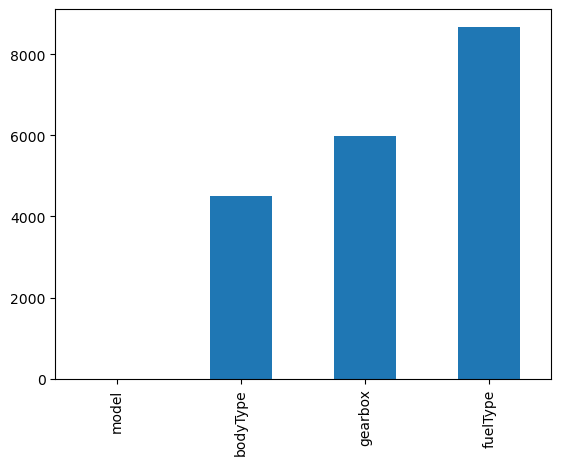

In [23]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  creatDate          150000 non-null  int64  
 13  price              150000 non-null  int64  
 14  v_0                150000 non-null  float64
 15  v_1                150000 non-null  float64
 16  v_

only 'notRepairedDamage' Dtype is Object

In [25]:
df['notRepairedDamage'].value_counts()

notRepairedDamage
0.0    111361
-       24324
1.0     14315
Name: count, dtype: int64

replace '-' by 'Nan'

In [26]:
df.replace({'notRepairedDamage': {'-': np.nan}}, inplace=True)

In [27]:
df['notRepairedDamage'].value_counts()

notRepairedDamage
0.0    111361
1.0     14315
Name: count, dtype: int64

In [28]:
df.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

### Distribution of Price

In [29]:
df['price']

0         1850
1         3600
2         6222
3         2400
4         5200
          ... 
149995    5900
149996    9500
149997    7500
149998    4999
149999    4700
Name: price, Length: 150000, dtype: int64

In [30]:
df['price'].value_counts()

price
500      2337
1500     2158
1200     1922
1000     1850
2500     1821
         ... 
9395        1
81900       1
16699       1
11998       1
14780       1
Name: count, Length: 3763, dtype: int64

<Axes: title={'center': 'Log Normal'}, xlabel='price'>

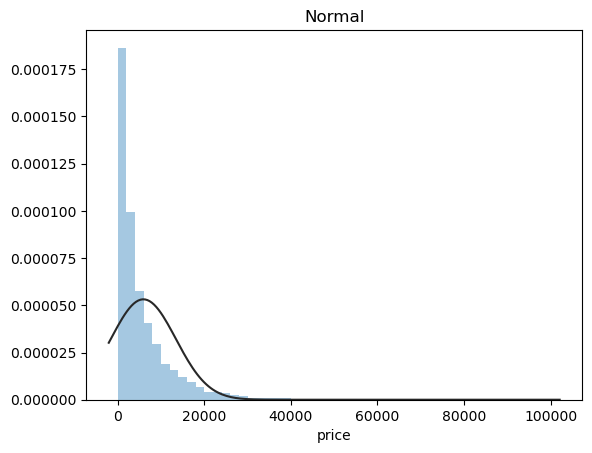

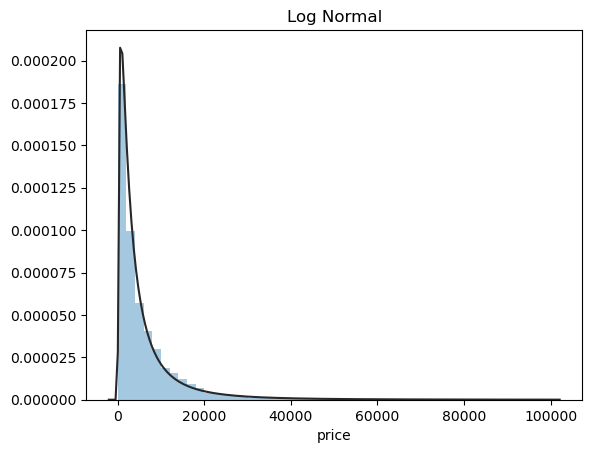

In [31]:
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
y = df['price']
plt.figure(1)
plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(2)
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

So, it doesn't follow a normal distribution

<Axes: title={'center': 'Johnson SU'}, xlabel='price'>

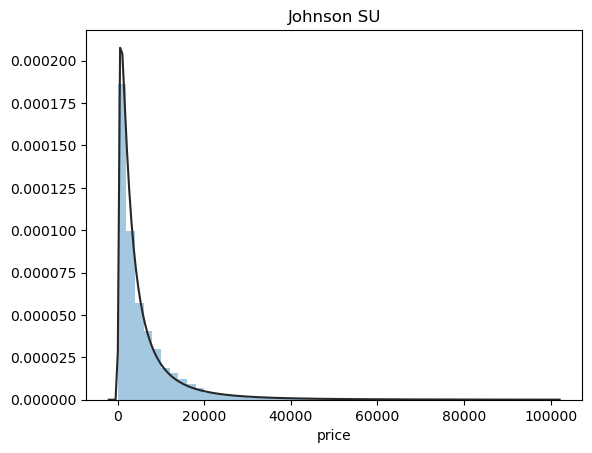

In [32]:
plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)

- Check skewness and kurtosis

Skewness: 3.346487
Kurtosis: 18.995183


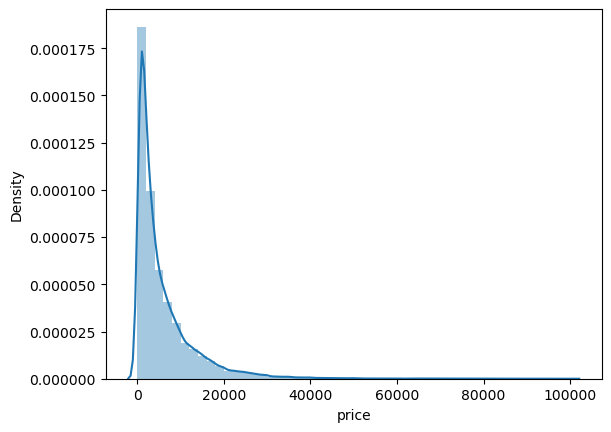

In [33]:
sns.distplot(df['price'])
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

In [34]:
df.skew(), df.kurt()

(SaleID                    -0.0
 name                  0.557606
 regDate               0.028495
 model                 1.484388
 brand                  1.15076
 bodyType               0.99153
 fuelType              1.595486
 gearbox               1.317514
 power                65.863178
 kilometer            -1.525921
 notRepairedDamage      2.43064
 regionCode            0.688881
 creatDate            -79.01331
 price                 3.346487
 v_0                  -1.316712
 v_1                   0.359454
 v_2                   4.842556
 v_3                   0.106292
 v_4                   0.367989
 v_5                  -4.737094
 v_6                   0.368073
 v_7                   5.130233
 v_8                   0.204613
 v_9                   0.419501
 v_10                   0.02522
 v_11                  3.029146
 v_12                  0.365358
 v_13                  0.267915
 v_14                 -1.186355
 dtype: object,
 SaleID                      -1.2
 name                 

<Axes: xlabel='Skewness', ylabel='Density'>

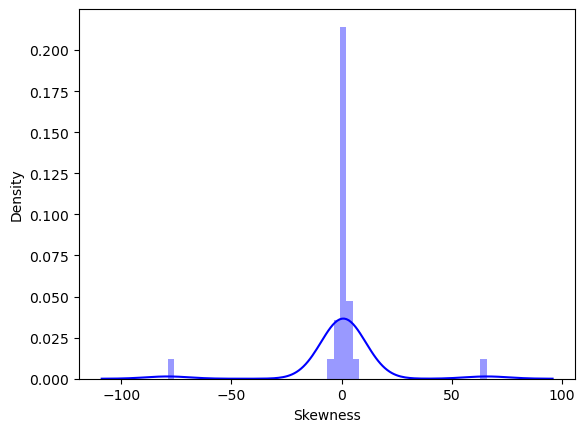

In [35]:
sns.distplot(df.skew(),color='blue',axlabel ='Skewness')

<Axes: xlabel='Kurtness', ylabel='Density'>

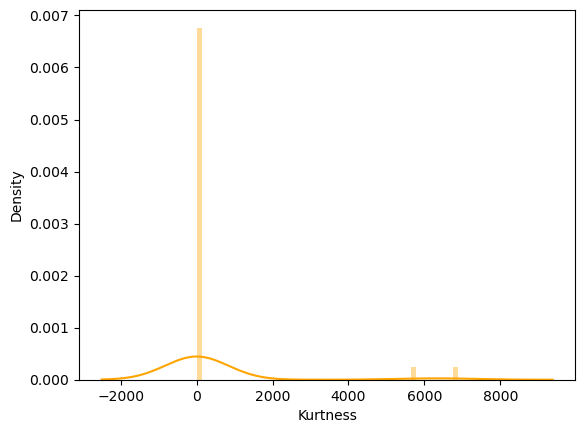

In [36]:
sns.distplot(df.kurt(),color='orange',axlabel ='Kurtness')

- View the specific frequency of the predicted value

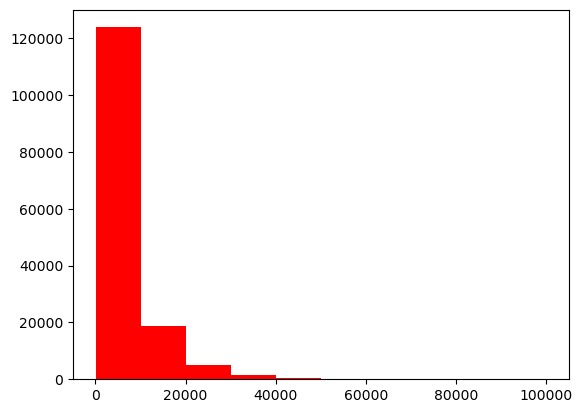

In [37]:
plt.hist(df['price'], orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

Check the frequency, there are very few values ​​greater than 20,000

- Perform log transformation for prediction, because the distribution of z after log transformation is more uniform

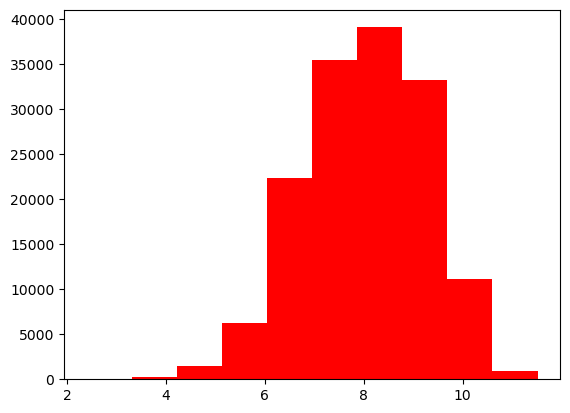

In [38]:
plt.hist(np.log(df['price']), orientation = 'vertical',histtype = 'bar', color ='red') 
plt.show()

### View unique distribution of category features

- Separation prediction value

In [39]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]

In [40]:
train = df['price']

- Unique distrbution of category features

In [41]:
for cat_fea in categorical_features:
    print(cat_fea + " distribution")
    print("{} features have {} different values".format(cat_fea, df[cat_fea].nunique()))
    print(df[cat_fea].value_counts())

name distribution
name features have 99662 different values
name
708       282
387       282
55        280
1541      263
203       233
         ... 
119983      1
63443       1
104410      1
154956      1
177672      1
Name: count, Length: 99662, dtype: int64
model distribution
model features have 248 different values
model
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
240.0        2
209.0        2
245.0        2
242.0        2
247.0        1
Name: count, Length: 248, dtype: int64
brand distribution
brand features have 40 different values
brand
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      2

### Numerical features analysis

In [42]:
numeric_features.append('price')

In [43]:
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

In [44]:
df.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


- Correlation analysis

In [45]:
price_numeric = df[numeric_features]
correlation = price_numeric.corr()
print(correlation['price'].sort_values(ascending = False),'\n')

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



<Axes: title={'center': 'Correlation of Numeric Features with Price'}>

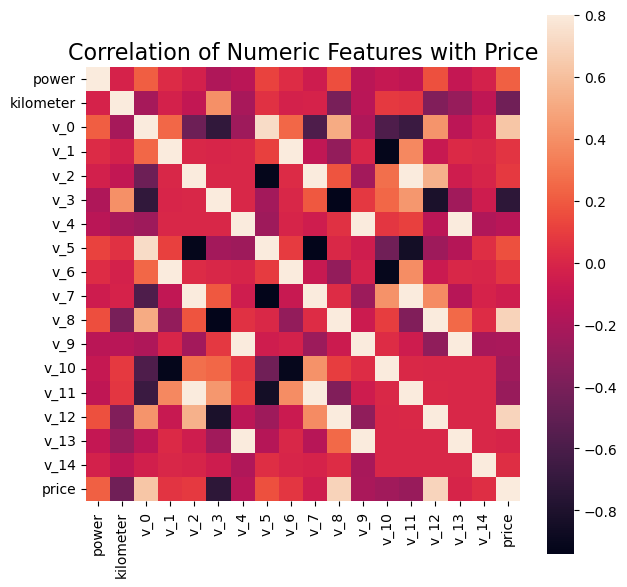

In [46]:
f , ax = plt.subplots(figsize = (7, 7))

plt.title('Correlation of Numeric Features with Price',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)

In [47]:
del price_numeric['price']

- Check skewness and kurtosis

In [48]:
for col in numeric_features:
    print('{:15}'.format(col), 'Skewness: {:05.2f}'.format(df[col].skew()) , '   ' ,'Kurtosis: {:06.2f}'.format(df[col].kurt()))

power           Skewness: 65.86     Kurtosis: 5733.45
kilometer       Skewness: -1.53     Kurtosis: 001.14
v_0             Skewness: -1.32     Kurtosis: 003.99
v_1             Skewness: 00.36     Kurtosis: -01.75
v_2             Skewness: 04.84     Kurtosis: 023.86
v_3             Skewness: 00.11     Kurtosis: -00.42
v_4             Skewness: 00.37     Kurtosis: -00.20
v_5             Skewness: -4.74     Kurtosis: 022.93
v_6             Skewness: 00.37     Kurtosis: -01.74
v_7             Skewness: 05.13     Kurtosis: 025.85
v_8             Skewness: 00.20     Kurtosis: -00.64
v_9             Skewness: 00.42     Kurtosis: -00.32
v_10            Skewness: 00.03     Kurtosis: -00.58
v_11            Skewness: 03.03     Kurtosis: 012.57
v_12            Skewness: 00.37     Kurtosis: 000.27
v_13            Skewness: 00.27     Kurtosis: -00.44
v_14            Skewness: -1.19     Kurtosis: 002.39
price           Skewness: 03.35     Kurtosis: 019.00


- Show distribution of every numerical featrues

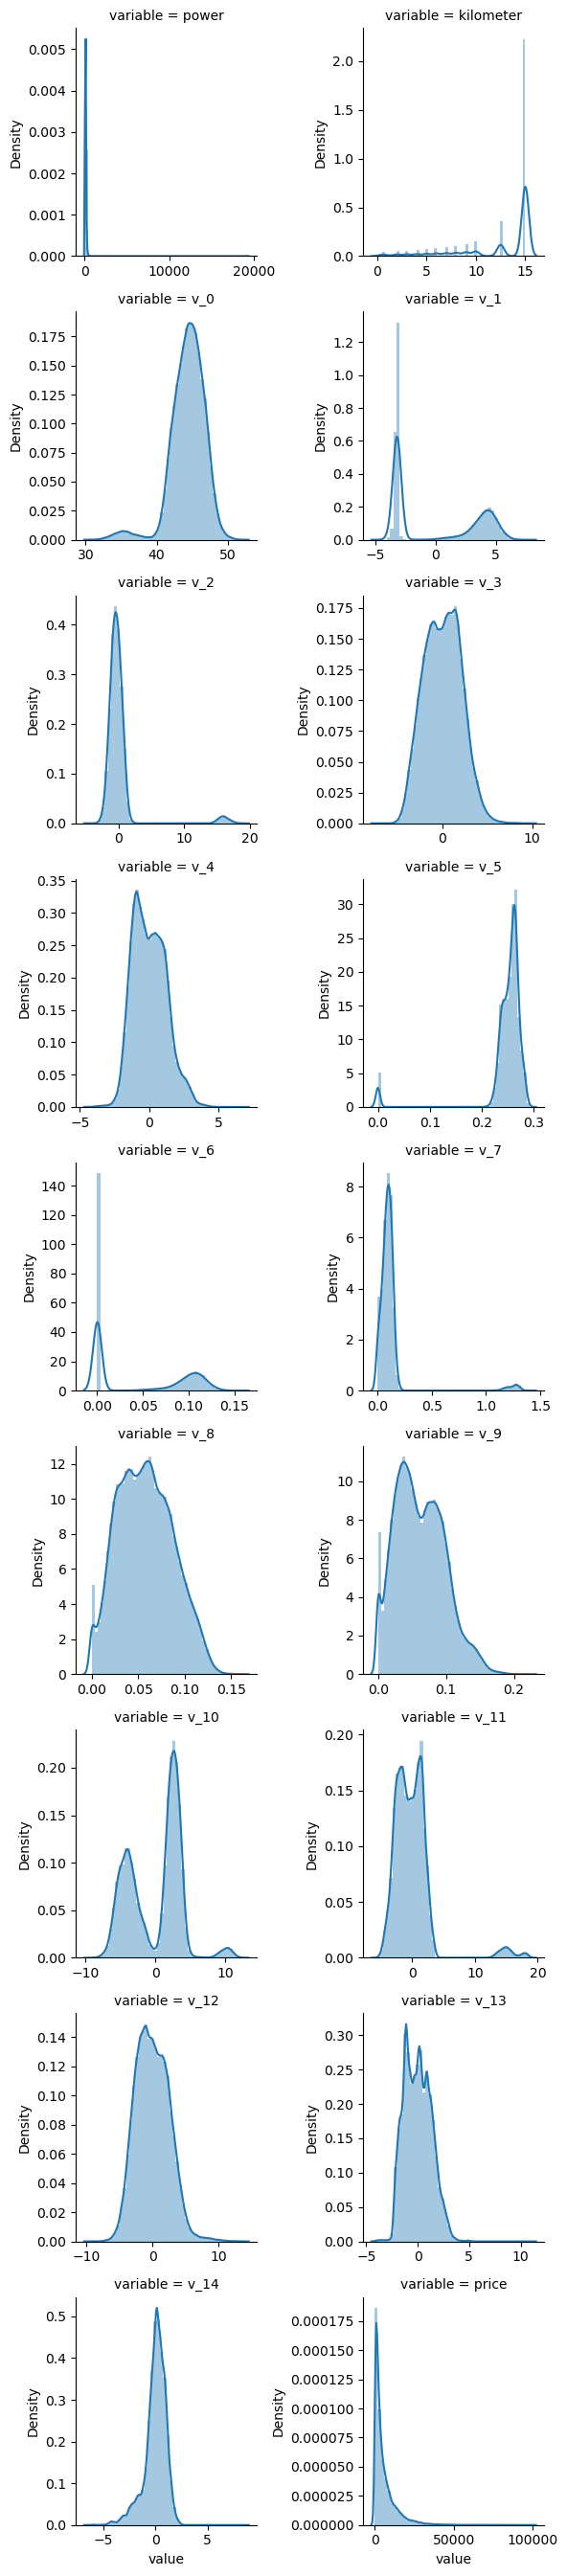

In [49]:
f = pd.melt(df, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

It can be seen that the anonymous features are relatively evenly distributed

- Visualizing the relationships between numerical features

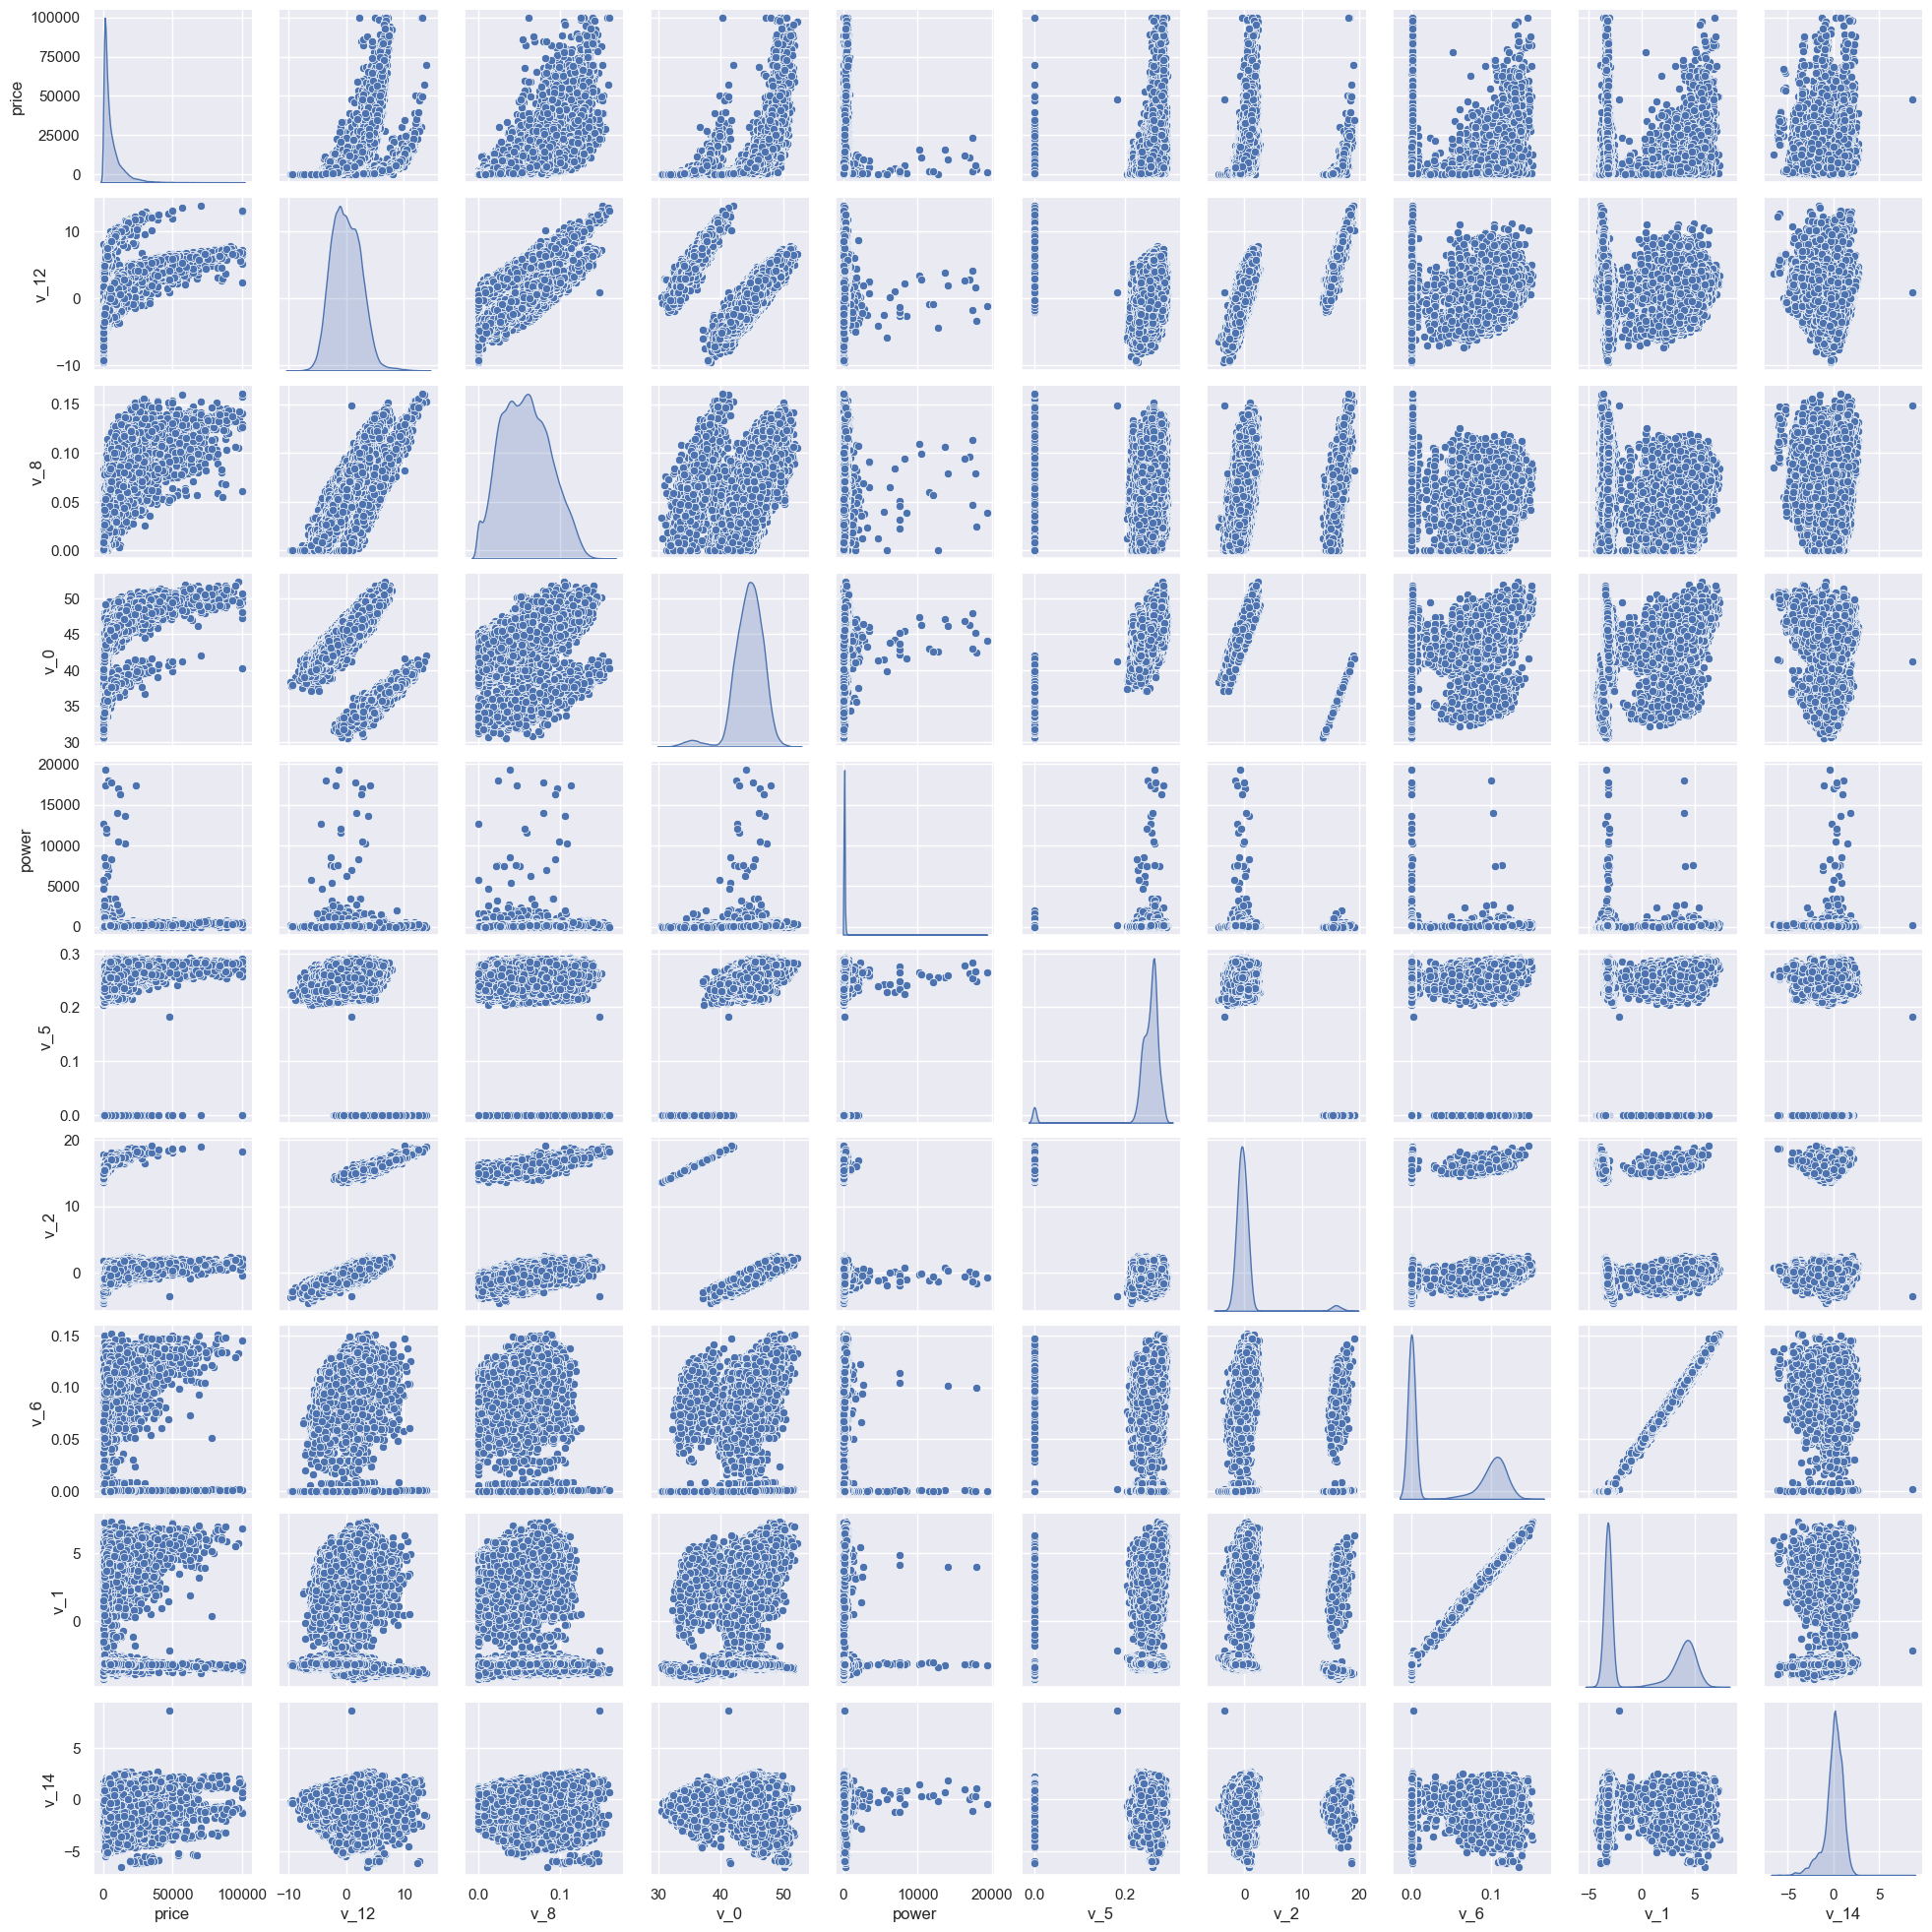

In [50]:
sns.set()
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(df[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

In [51]:
df.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

In [52]:
train

0         1850
1         3600
2         6222
3         2400
4         5200
          ... 
149995    5900
149996    9500
149997    7500
149998    4999
149999    4700
Name: price, Length: 150000, dtype: int64

- Visualization of multivariate regression relationships

<Axes: xlabel='v_13', ylabel='price'>

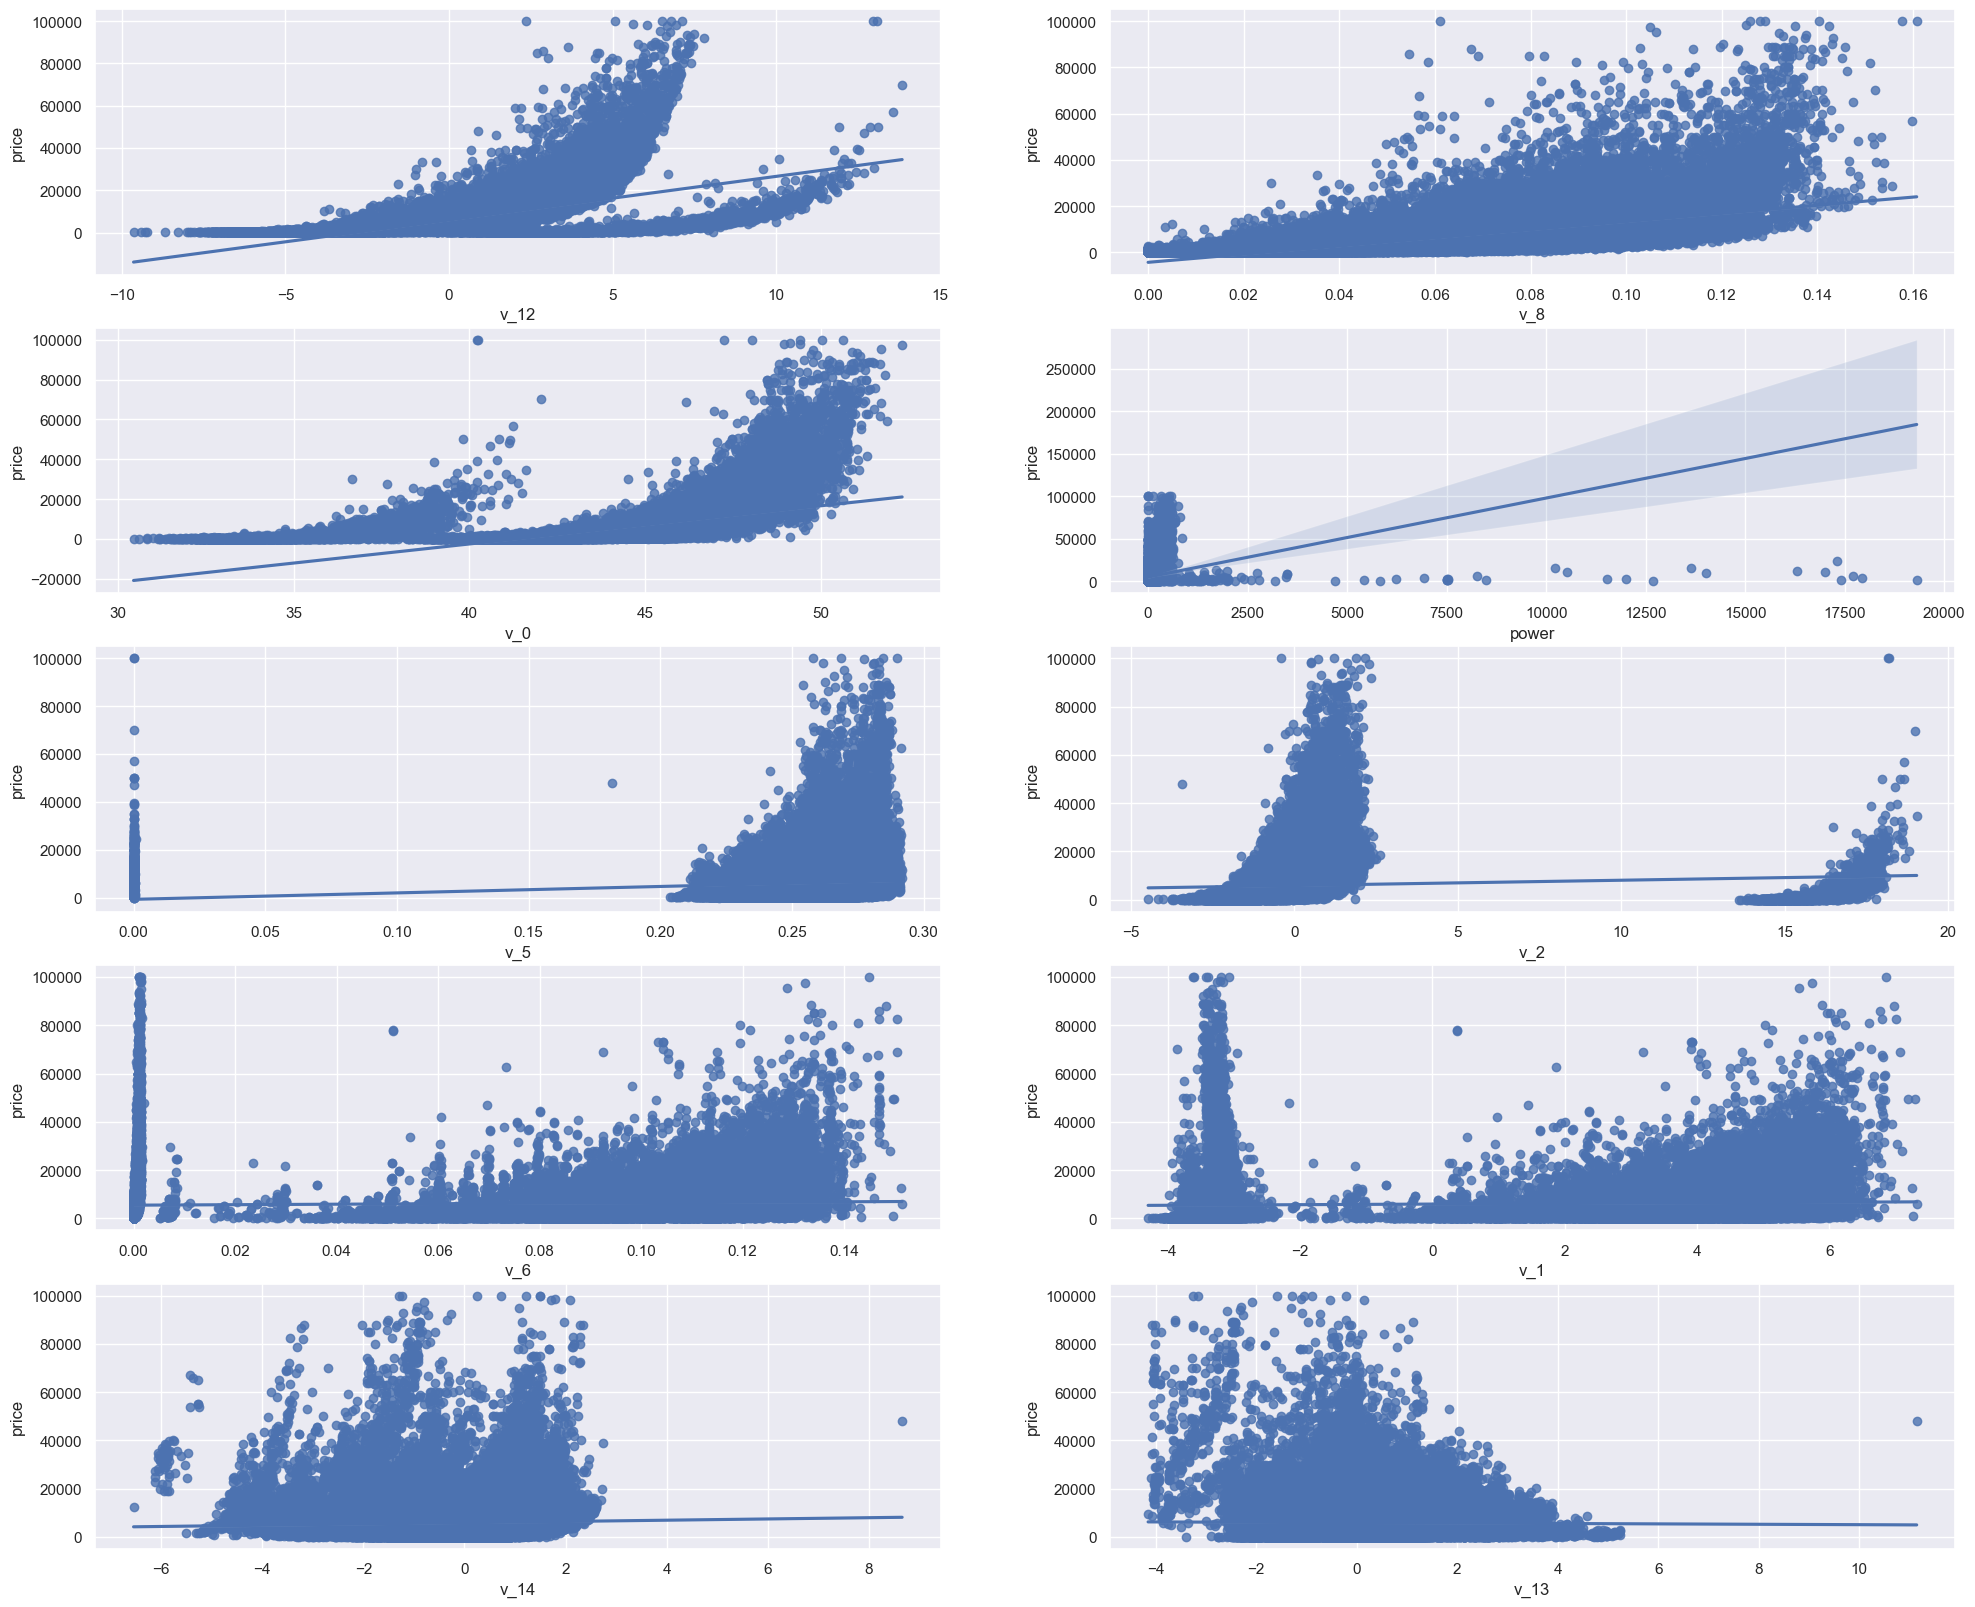

In [53]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))

v_12_scatter_plot = pd.concat([train,df['v_12']],axis = 1)
sns.regplot(x='v_12',y = 'price', data = v_12_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

v_8_scatter_plot = pd.concat([train,df['v_8']],axis = 1)
sns.regplot(x='v_8',y = 'price',data = v_8_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

v_0_scatter_plot = pd.concat([train,df['v_0']],axis = 1)
sns.regplot(x='v_0',y = 'price',data = v_0_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

power_scatter_plot = pd.concat([train,df['power']],axis = 1)
sns.regplot(x='power',y = 'price',data = power_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

v_5_scatter_plot = pd.concat([train,df['v_5']],axis = 1)
sns.regplot(x='v_5',y = 'price',data = v_5_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

v_2_scatter_plot = pd.concat([train,df['v_2']],axis = 1)
sns.regplot(x='v_2',y = 'price',data = v_2_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

v_6_scatter_plot = pd.concat([train,df['v_6']],axis = 1)
sns.regplot(x='v_6',y = 'price',data = v_6_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

v_1_scatter_plot = pd.concat([train,df['v_1']],axis = 1)
sns.regplot(x='v_1',y = 'price',data = v_1_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

v_14_scatter_plot = pd.concat([train,df['v_14']],axis = 1)
sns.regplot(x='v_14',y = 'price',data = v_14_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

v_13_scatter_plot = pd.concat([train,df['v_13']],axis = 1)
sns.regplot(x='v_13',y = 'price',data = v_13_scatter_plot,scatter= True, fit_reg=True, ax=ax10)


### Category feature analysis

- Unique distribution

In [54]:
for fea in categorical_features:
    print(df[fea].nunique())

99662
248
40
8
7
2
2
7905


In [55]:
categorical_features

['name',
 'model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage',
 'regionCode']

- Boxplot visualization

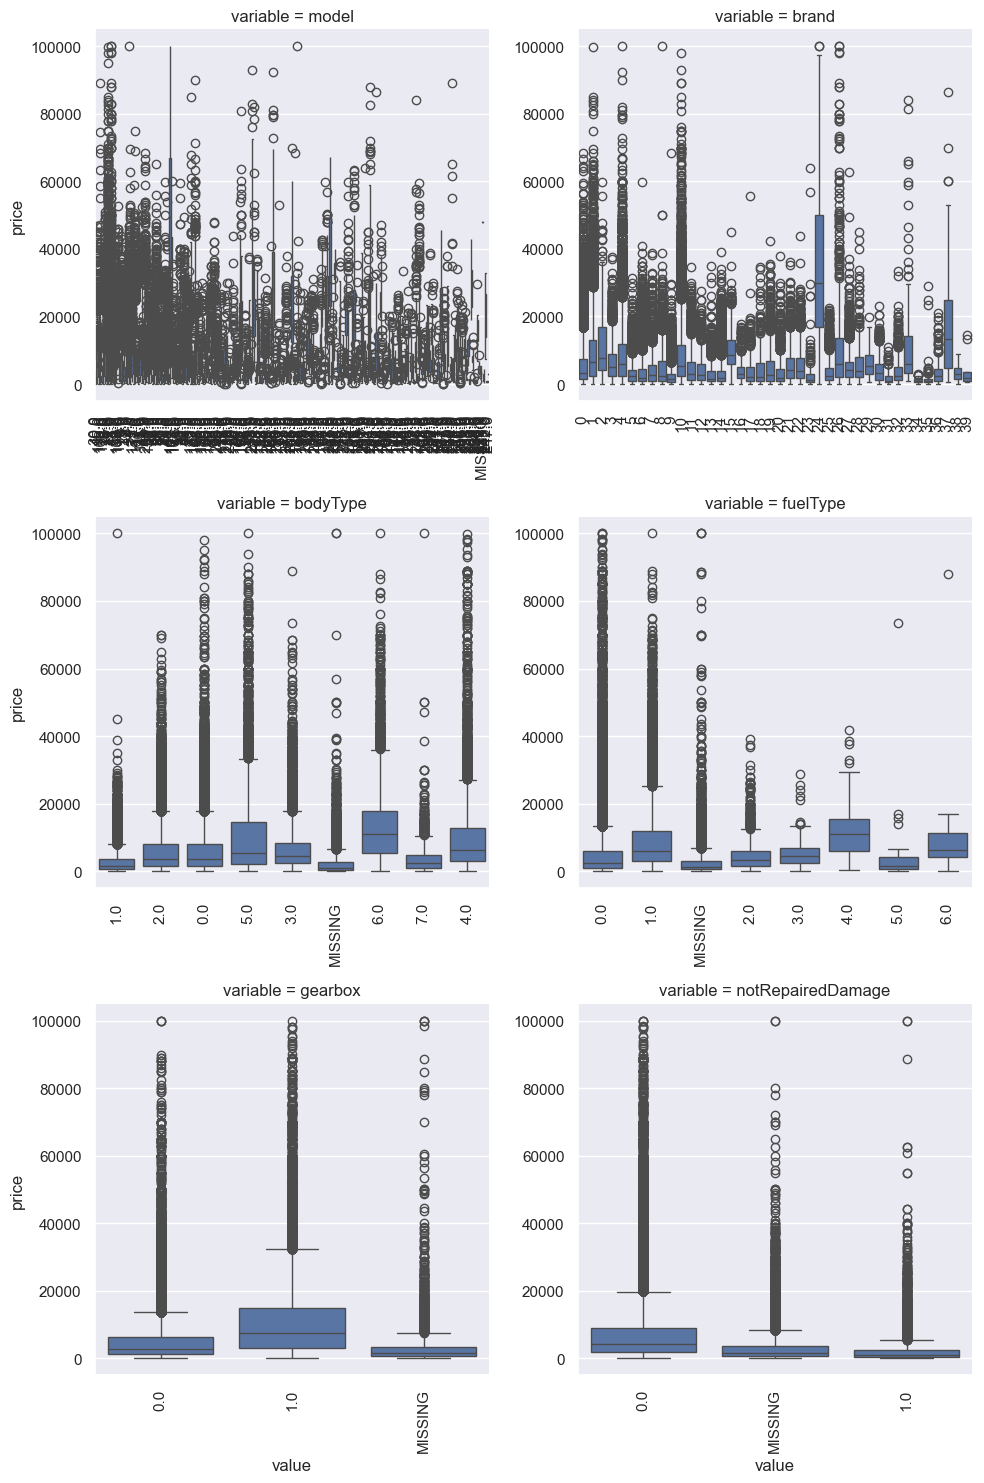

In [56]:
categorical_features = ['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']
for c in categorical_features:
    df[c] = df[c].astype('category')
    if df[c].isnull().any():
        df[c] = df[c].cat.add_categories(['MISSING'])
        df[c] = df[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(df, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "price")

In [57]:
df.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

- Violin plot

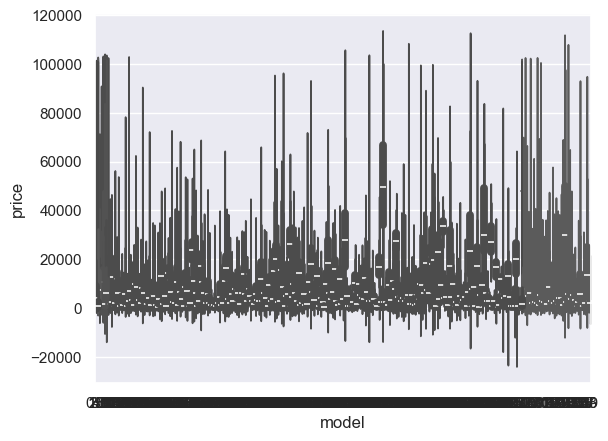

In [58]:
catg_list=categorical_features
target='price'
for catg in catg_list:
    sns.violinplot(x=catg,y=target,data=df)
    plt.show

In [59]:
categorical_features = ['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']

- Bar chart

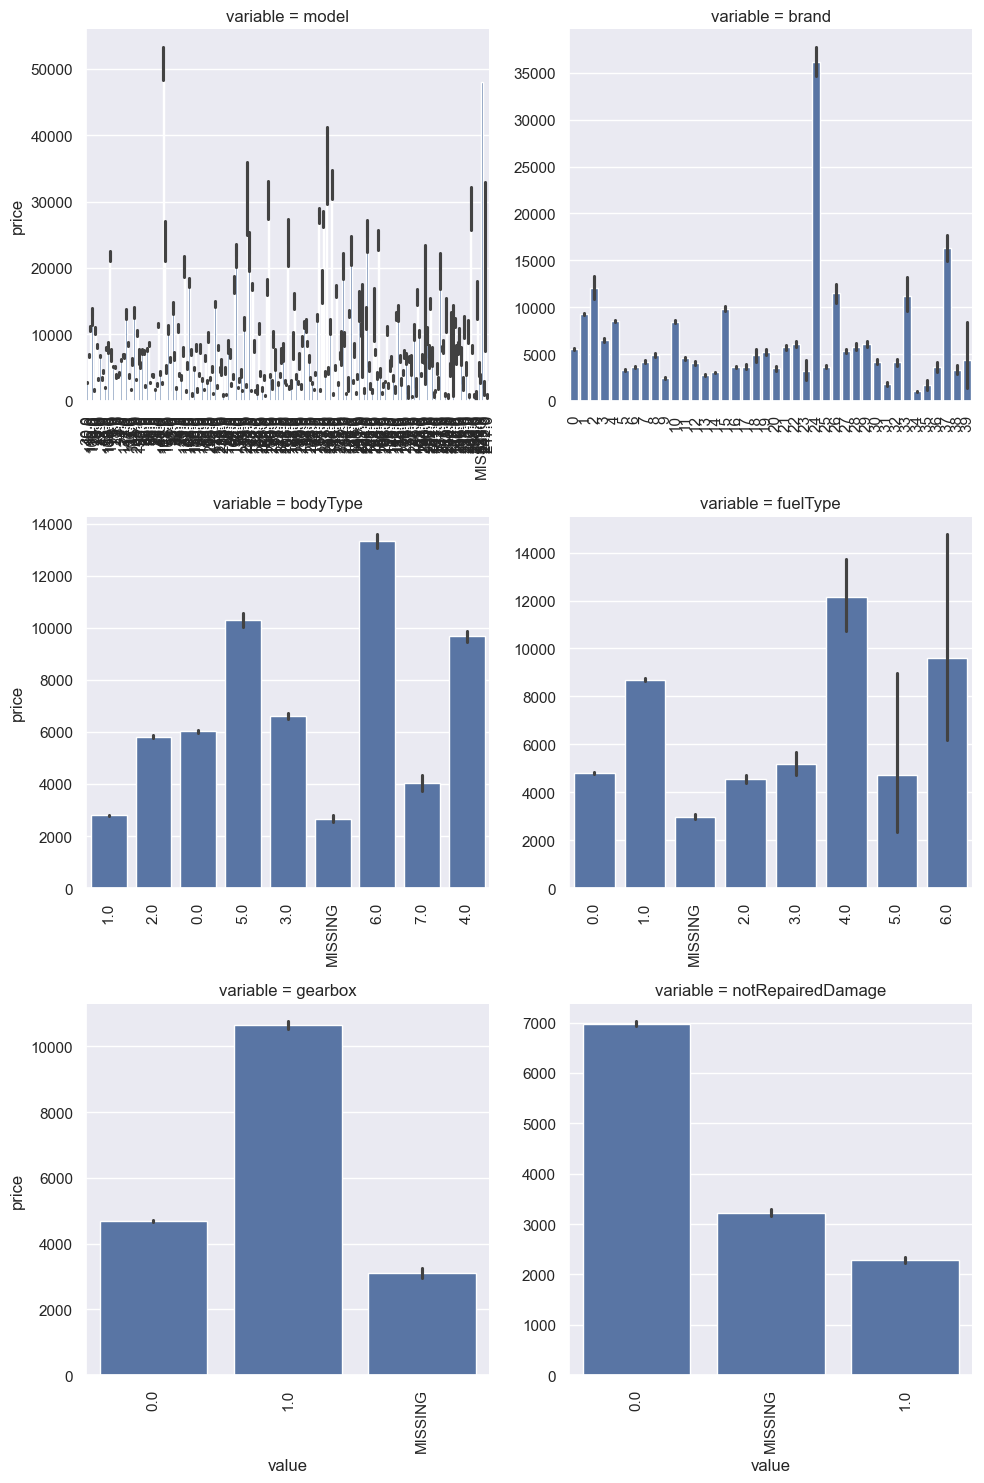

In [60]:
def bar_plot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(df, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(bar_plot, "value", "price")

- Count plot

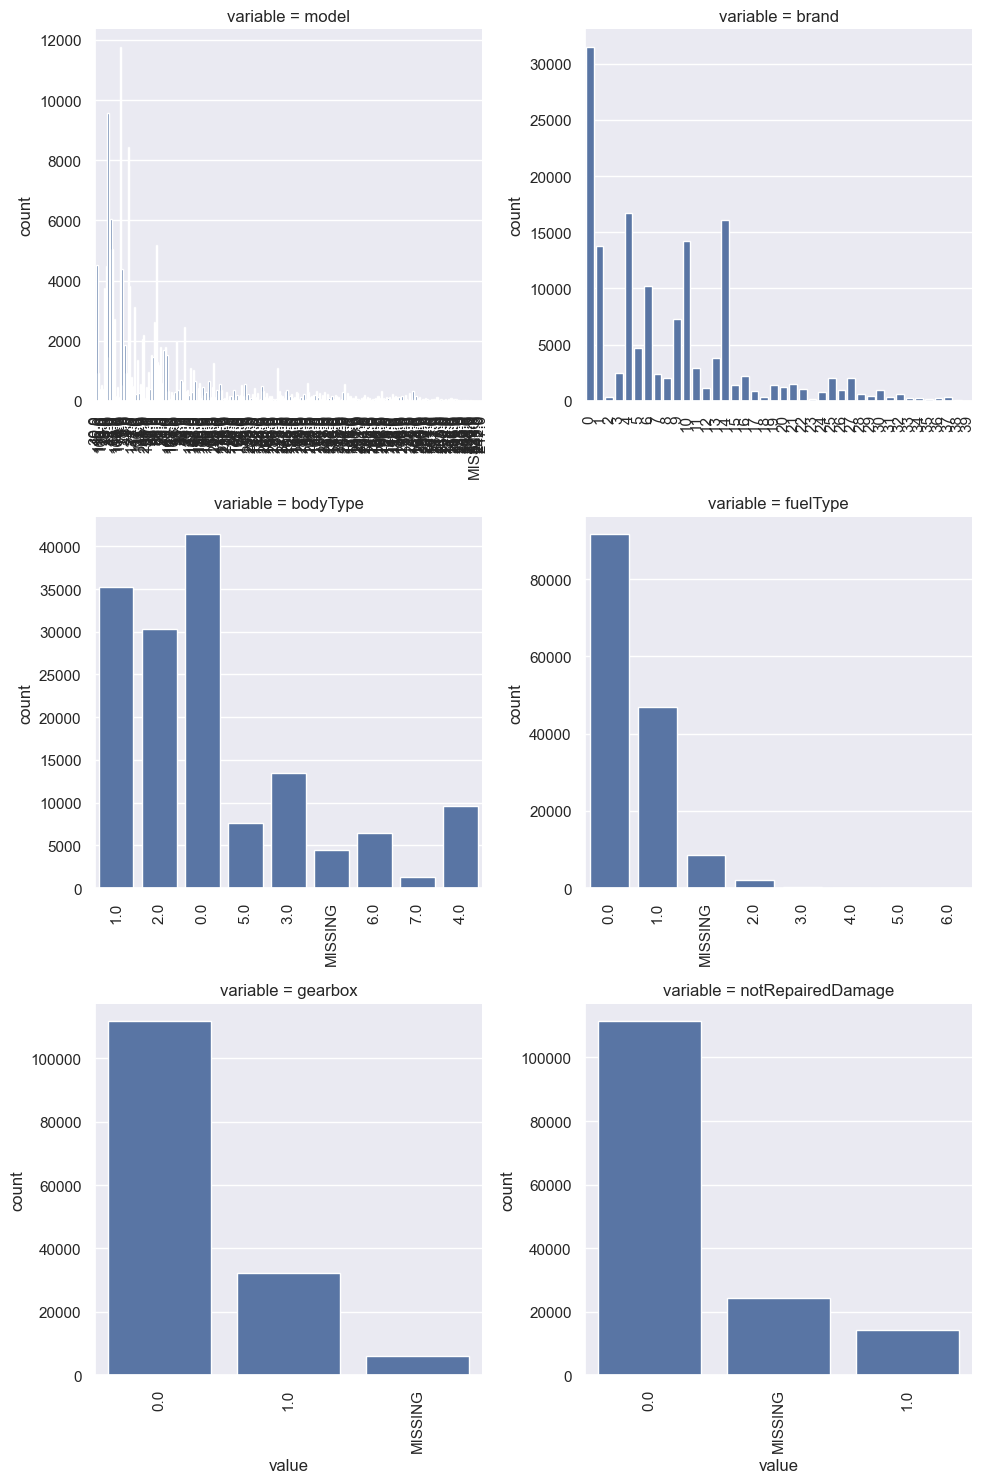

In [61]:
def count_plot(x,  **kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)

f = pd.melt(df,  value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(count_plot, "value")